 <챗봇 Miner: Text Mining>

# 1.DB 연동
- 1.1 DB 불러오기
- 1.2 DB 인덱스 수정

## 1.1 DB 불러오기

In [21]:
import pymysql.cursors
import numpy as np
conn = pymysql.connect(host='169.56.124.93', user='airchat' , password='airchat1234', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor) # Connection 으로부터 Dictoionary Cursor 생성

sql='SELECT CHAT_CNVRS_ID as ID,substr(CHAT_SEND_DTS,1,14) as date, substr(CHAT_SEND_DTS,1,14) as date_index ,CHAT_SEND_TEXT as text, CHAT_CONFI_RATE as conf from airchat.ICHAT_LOG where CHAT_CONFI_RATE > 0   '
a=curs.execute(sql)#쿼리문에 의해 디비를 불러옴

db=curs.fetchall()
#print(float(a))

#rows=curs.fetchall()

#avg=np.mean(rows)
#print(rows)

conn.close()

In [173]:
import pandas as pd
from pandas import Series, DataFrame
db1=DataFrame(db)

db1['datetime']=db1['date_index'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))  #db1에 datetime 이라는 index를 설정해주기 위해 datetime 이라는 열을 설정
#  .apply(lambda x: ~~~ 의 의미는  내가 x를 다룰 건데, ~~~ 이런식으로 할꺼야 라는 뜻
# %Y%m%d 형식으로 된 X를 pandas의 to_datetime 함수를 통해 datetime object로 변환
db1['message_num']=1   #메세지 수를 합산하기 위해 만든 컬럼
db1.set_index(db1['datetime'], inplace=True)  #datetime 컬럼을 index로 만듬 

db1=db1.drop('datetime',1)  #기존에 만들었던 datetime 컬럼을 삭제
db1=db1.drop('date_index', 1)
db1=db1.drop('date', 1)
db1

,ID,conf,text,message_num
datetime,,,,
2018-02-13 15:23:53,00003864-41fd-4d2a-9d5a-a66a6f071036,1.00000000000000000000,주차장 위치,1
2018-02-21 14:22:10,000dae65-1e6e-4b5c-80c5-a8c514c7030d,0.65861263275146490000,눈이 아파,1
2018-03-05 17:06:56,00288665-5f3d-4733-8d97-1c694967f823,0.30894076824188230000,정시 경쟁률보기,1
2018-02-26 19:26:38,003d49cd-cc9b-4b98-9707-24afd918f5b5,0.30521347522735600000,대학안내,1
2018-02-26 19:26:42,003d49cd-cc9b-4b98-9707-24afd918f5b5,0.90597867965698240000,셔틀 시간,1
2018-02-26 19:26:44,003d49cd-cc9b-4b98-9707-24afd918f5b5,0.30521347522735600000,2호선 잠실역,1
2018-01-14 14:11:56,004a119e-b9bd-4ed1-b1bc-1ace20b1e170,1.00000000000000000000,안녕,1
2018-01-14 14:11:56,004a119e-b9bd-4ed1-b1bc-1ace20b1e170,1.00000000000000000000,안녕,1
2018-02-06 10:44:02,00a3a5a7-ca1b-4c6e-9e7e-c534c2120db2,1.00000000000000000000,진료 연락처,1


## 1.2 DB 인덱스 수정

In [29]:
import pymysql.cursors
import numpy as np
conn = pymysql.connect(host='169.56.124.93', user='airchat' , password='airchat1234', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor) # Connection 으로부터 Dictoionary Cursor 생성


sql='select CHAT_CNVRS_ID as ID, timestampdiff(second, FRST_CONN_DTM, LAST_CONN_DTM) as stay_sec, FRST_CONN_DTM as date from airchat.ICHAT_CONN_STAT'
#sql='SELECT DISTINCT CHAT_CNVRS_ID as ID ,substr(CHAT_SEND_DTS,1,8) as date from chat.ICHAT_LOG where CHAT_CONFI_RATE > 0  '
a=curs.execute(sql)#쿼리문에 의해 디비를 불러옴

con_ID=curs.fetchall()
#print(float(a))

#rows=curs.fetchall()

#avg=np.mean(rows)
#print(rows)

conn.close()

In [30]:
con_ID1=DataFrame(con_ID)

con_ID1['datetime']=con_ID1['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))  #db1에 datetime 이라는 index를 설정해주기 위해 datetime 이라는 열을 설정
#  .apply(lambda x: ~~~ 의 의미는  내가 x를 다룰 건데, ~~~ 이런식으로 할꺼야 라는 뜻
# %Y%m%d 형식으로 된 X를 pandas의 to_datetime 함수를 통해 datetime object로 변환
con_ID1['user_num']=1   #메세지 수를 합산하기 위해 만든 컬럼
con_ID1.set_index(con_ID1['datetime'], inplace=True)  #datetime 컬럼을 index로 만듬 

con_ID1=con_ID1.drop('datetime',1)  #기존에 만들었던 datetime 컬럼을 삭제
df=pd.merge(db1,con_ID1,how='left')
df

,ID,conf,text,message_num,date,stay_sec,user_num
0,00003864-41fd-4d2a-9d5a-a66a6f071036,1.00000000000000000000,주차장 위치,1,20180213152343,10.0,1.0
1,000dae65-1e6e-4b5c-80c5-a8c514c7030d,0.65861263275146490000,눈이 아파,1,20180221142207,3.0,1.0
2,00288665-5f3d-4733-8d97-1c694967f823,0.30894076824188230000,정시 경쟁률보기,1,20180305170648,12.0,1.0
3,003d49cd-cc9b-4b98-9707-24afd918f5b5,0.30521347522735600000,대학안내,1,20180226192636,8.0,1.0
4,003d49cd-cc9b-4b98-9707-24afd918f5b5,0.90597867965698240000,셔틀 시간,1,20180226192636,8.0,1.0
5,003d49cd-cc9b-4b98-9707-24afd918f5b5,0.30521347522735600000,2호선 잠실역,1,20180226192636,8.0,1.0
6,004a119e-b9bd-4ed1-b1bc-1ace20b1e170,1.00000000000000000000,안녕,1,20180114141115,42.0,1.0
7,004a119e-b9bd-4ed1-b1bc-1ace20b1e170,1.00000000000000000000,안녕,1,20180114141115,42.0,1.0
8,00a3a5a7-ca1b-4c6e-9e7e-c534c2120db2,1.00000000000000000000,진료 연락처,1,20180206104358,7.0,1.0
9,0131665b-e803-49cf-b83c-78799dbde573,0.30268753767013550000,대학안내,1,20180312163239,1.0,1.0


 
   
   # 2.Text Mining_품사별 어휘 분석
  

 ## 2.1 텍스트 불러오기

In [31]:
df['text']
dff = df['text']
dff

0                  주차장 위치
1                   눈이 아파
2                정시 경쟁률보기
3                    대학안내
4                   셔틀 시간
5                 2호선 잠실역
6                      안녕
7                      안녕
8                  진료 연락처
9                    대학안내
10                   대학안내
11                 식당 연락처
12                  생활관식당
13                     시험
14                   감염내과
15                     위치
16                  병원 안내
17                     위치
18                     병원
19                종양내과 위치
20                    무엇을
21      챗봇으로 무엇을 할 수 있나요?
22                     챗봇
23                  진료 안내
24                  진료 예약
25               2. 진료 예약
26                  진료 예약
27                 3호선 위치
28                   제1전공
29                   변경정보
              ...        
6846                    예
6847                   하이
6848                   하이
6849                   성적
6850                   성적
6851                  의료진
6852                가정의학과
6853        

## 2.2 명사 

### 2.2.1 명사 추출

In [36]:
brother_tae_change = str(list(df['text'])) ###################형태 변환

import nltk
from konlpy.tag import Twitter
t = Twitter()

noun_comehere = t.nouns(brother_tae_change)   ################명사 추출
noun_comehere

['주차장',
 '위치',
 '눈',
 '정시',
 '경쟁률',
 '보기',
 '대학',
 '안내',
 '셔틀',
 '시간',
 '호선',
 '잠실역',
 '안녕',
 '안녕',
 '진료',
 '연락처',
 '대학',
 '안내',
 '대학',
 '안내',
 '식당',
 '연락처',
 '생활관',
 '식당',
 '시험',
 '감염',
 '내과',
 '위치',
 '병원',
 '안내',
 '위치',
 '병원',
 '종양',
 '내과',
 '위치',
 '무엇',
 '챗봇',
 '무엇',
 '수',
 '챗봇',
 '진료',
 '안내',
 '진료',
 '예약',
 '진료',
 '예약',
 '진료',
 '예약',
 '호선',
 '위치',
 '제',
 '전공',
 '변경',
 '정보',
 '진료',
 '연락처',
 '감염',
 '내과',
 '성적',
 '성적',
 '경쟁률',
 '보기',
 '경쟁률',
 '보기',
 '학생',
 '부',
 '종합',
 '경쟁률',
 '보기',
 '예',
 '진료',
 '시간',
 '가정의학',
 '대학',
 '안내',
 '셔틀',
 '위치',
 '학사',
 '안내',
 '호선',
 '신촌역',
 '셔틀',
 '연락처',
 '셔틀',
 '위치',
 '호선',
 '불광역',
 '셔틀',
 '연락처',
 '학사',
 '안내',
 '학사',
 '안내',
 '학사',
 '안내',
 '대학',
 '안내',
 '병원',
 '안내',
 '위치',
 '주차장',
 '병원',
 '주차장',
 '진료',
 '위치',
 '류마티스',
 '내과',
 '진료',
 '위치',
 '가정의학',
 '진료',
 '시간',
 '감염',
 '내과',
 '가정의학',
 '예',
 '진료',
 '시간',
 '재활',
 '병원',
 '재활',
 '의학과',
 '대학',
 '생활',
 '안내',
 '식당',
 '시간',
 '진료',
 '예약',
 '대학',
 '안내',
 '식당',
 '시간',
 '진료',
 '예약',
 '대학',
 '생활',
 '안내',
 '식당',
 '위치',
 

<b> 한 자리수 이상의 명사 추출 </b>

In [39]:
noun_comehere1 = [noun_comehere for noun_comehere in noun_comehere if len(noun_comehere) > 1 ]
noun_comehere1

['주차장',
 '위치',
 '정시',
 '경쟁률',
 '보기',
 '대학',
 '안내',
 '셔틀',
 '시간',
 '호선',
 '잠실역',
 '안녕',
 '안녕',
 '진료',
 '연락처',
 '대학',
 '안내',
 '대학',
 '안내',
 '식당',
 '연락처',
 '생활관',
 '식당',
 '시험',
 '감염',
 '내과',
 '위치',
 '병원',
 '안내',
 '위치',
 '병원',
 '종양',
 '내과',
 '위치',
 '무엇',
 '챗봇',
 '무엇',
 '챗봇',
 '진료',
 '안내',
 '진료',
 '예약',
 '진료',
 '예약',
 '진료',
 '예약',
 '호선',
 '위치',
 '전공',
 '변경',
 '정보',
 '진료',
 '연락처',
 '감염',
 '내과',
 '성적',
 '성적',
 '경쟁률',
 '보기',
 '경쟁률',
 '보기',
 '학생',
 '종합',
 '경쟁률',
 '보기',
 '진료',
 '시간',
 '가정의학',
 '대학',
 '안내',
 '셔틀',
 '위치',
 '학사',
 '안내',
 '호선',
 '신촌역',
 '셔틀',
 '연락처',
 '셔틀',
 '위치',
 '호선',
 '불광역',
 '셔틀',
 '연락처',
 '학사',
 '안내',
 '학사',
 '안내',
 '학사',
 '안내',
 '대학',
 '안내',
 '병원',
 '안내',
 '위치',
 '주차장',
 '병원',
 '주차장',
 '진료',
 '위치',
 '류마티스',
 '내과',
 '진료',
 '위치',
 '가정의학',
 '진료',
 '시간',
 '감염',
 '내과',
 '가정의학',
 '진료',
 '시간',
 '재활',
 '병원',
 '재활',
 '의학과',
 '대학',
 '생활',
 '안내',
 '식당',
 '시간',
 '진료',
 '예약',
 '대학',
 '안내',
 '식당',
 '시간',
 '진료',
 '예약',
 '대학',
 '생활',
 '안내',
 '식당',
 '위치',
 '알려줭',
 '식당',
 '위치',
 '알려줭',
 '대학',


### 2.2.2 명사어휘 빈도 및 그래프

In [40]:
ko = nltk.Text(noun_comehere1)
ko

<Text: 주차장 위치 정시 경쟁률 보기 대학 안내 셔틀...>

#### A. MATPLOTLIB 그래프

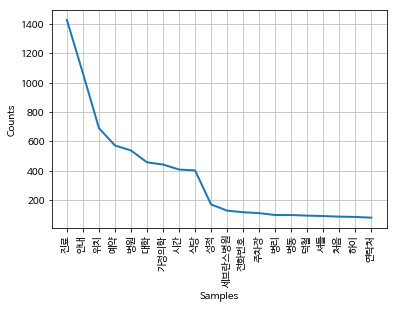

In [44]:
from matplotlib import pylab
from matplotlib import font_manager, rc 
font_fname = 'C:/Anaconda3/Lib/site-packages/pytagcloud/fonts/NanumBarunGothic.ttf' # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name() 
rc('font', family=font_name)


ko.plot(20)

#### B. 명사, 빈도수 추출

In [45]:
ko100 = ko.vocab().most_common(100)
ko100

[('진료', 1426),
 ('안내', 1063),
 ('위치', 689),
 ('예약', 571),
 ('병원', 537),
 ('대학', 456),
 ('가정의학', 441),
 ('시간', 407),
 ('식당', 401),
 ('성적', 169),
 ('세브란스병원', 127),
 ('전화번호', 116),
 ('주차장', 110),
 ('병리', 97),
 ('병동', 97),
 ('덕철', 93),
 ('셔틀', 90),
 ('처음', 86),
 ('하이', 84),
 ('연락처', 79),
 ('생활', 67),
 ('내과', 66),
 ('호선', 64),
 ('정보', 53),
 ('경쟁률', 51),
 ('보기', 51),
 ('센터', 50),
 ('재활', 49),
 ('강희', 49),
 ('클리', 46),
 ('의료', 45),
 ('감염', 41),
 ('심장', 39),
 ('알려줭', 38),
 ('소개', 37),
 ('기타', 37),
 ('상세', 36),
 ('방가', 35),
 ('어린이병원', 35),
 ('서비스', 32),
 ('시험', 31),
 ('안녕', 30),
 ('선택', 30),
 ('외과', 29),
 ('연세', 27),
 ('학사', 26),
 ('이비인후과', 26),
 ('전화', 26),
 ('챗봇', 25),
 ('등급', 23),
 ('기준', 23),
 ('소아', 22),
 ('전공', 21),
 ('출석', 21),
 ('오늘', 21),
 ('혈관', 21),
 ('심재용', 21),
 ('청향', 19),
 ('생활관', 18),
 ('어디', 18),
 ('날씨', 18),
 ('약도', 18),
 ('다이얼로그', 18),
 ('불광역', 16),
 ('개발', 16),
 ('등록', 16),
 ('잠실역', 15),
 ('신촌역', 15),
 ('메뉴', 15),
 ('축제', 15),
 ('바보', 15),
 ('요금', 14),
 ('경고', 13),
 ('학생', 1

#### C. 명사 빈도수 데이터 DB로 변환

In [56]:
brother_tae_change = str(list(df['text']))

import nltk
from konlpy.tag import Twitter
t = Twitter()
noun_comehere = t.nouns(brother_tae_change) 
noun_comehere
noun_comehere1 = [noun_comehere for noun_comehere in noun_comehere if len(noun_comehere) > 1 ]
noun_comehere1
ko = nltk.Text(tokens_ko)


ko10=ko.vocab().most_common(10)
db1= DataFrame(ko10)
db1[[0,]]

,0
0,진료
1,안내
2,위치
3,예약
4,병원
5,대학
6,가정의학
7,시간
8,식당
9,성적


#### D. PLOTLY 그래프

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
#막대그래프o


py.sign_in('simwooinfunnywork','cGhAtiBeOsd3YTlm5xZQ')

data = [
    go.Bar(
        x=db1[0],
        y=db1[1],
        name='Top10',
        marker=dict(
        color='rgb(204,204,204)',
    ))
        ] 
layout = plotly.graph_objs.Layout(
    title='TOP 10 Bar-chart'
)
 
figure = plotly.graph_objs.Figure(
    data=data, layout=layout
)
 

py.iplot(figure, filename='basic_bar_chart.html')

#### E. 워드 클라우드

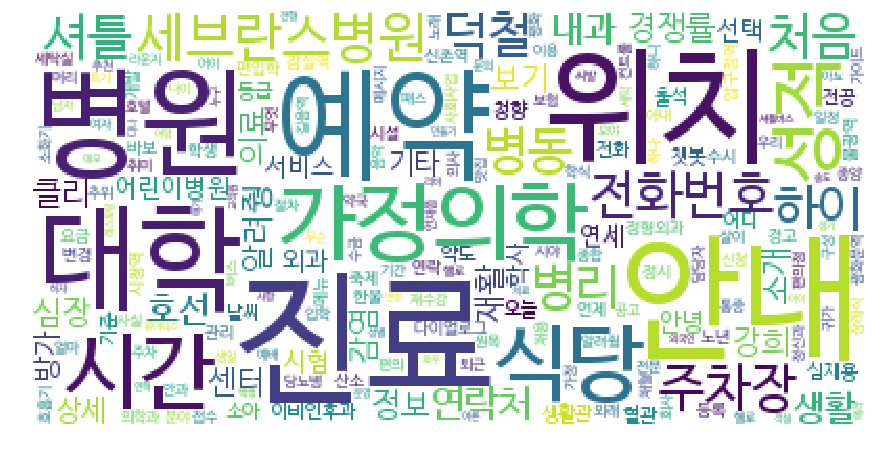

In [60]:
data = ko.vocab().most_common(500)
tmp_data = dict(data)
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='C:/Anaconda3/Lib/site-packages/pytagcloud/fonts/NanumBarunGothic.ttf',
                       relative_scaling = 0.2,
                       background_color='white',
                      ).generate_from_frequencies(tmp_data)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


   ## 2.3 형용사, 동사 

###  2.3.1 형용사, 동사 어휘 추출

    
       
# 3. Text Mining_연관성 분석

## 3.1 KOMORAN

### 3.1.1 KOMORAN 형태소 분석

In [145]:
#2.1에서 dff 데이터 사용 예정
#noun_comehere2 = [noun_comehere for noun_comehere in noun_comehere if len(noun_comehere) > 1 ]
#noun_comehere2

lines = list(dff)  ##################################################  dff 리스트화하고 lines이라 칭함

sentences = [line for line in lines if line != '']   ############### 빈 문장 제거 후 sentences라 칭함


for line in lines[:10]:
    if line != '':
        print(line)

from konlpy.tag import Komoran
tagger = Komoran()
tags = tagger.pos(sentences[0])

tagged_sentences = [tagger.pos(sent) for sent in sentences]

tagged_sentences

주차장 위치
눈이 아파
정시 경쟁률보기
대학안내
셔틀 시간
2호선 잠실역
안녕
안녕
진료 연락처
대학안내


[[('주차장', 'NNG'), ('위치', 'NNG')],
 [('눈', 'NNG'), ('이', 'JKS'), ('아프', 'VA'), ('아', 'EC')],
 [('정시', 'NNG'), ('경쟁', 'NNG'), ('률', 'XSN'), ('보', 'VV'), ('기', 'ETN')],
 [('대학', 'NNG'), ('안내', 'NNG')],
 [('셔틀', 'NNG'), ('시간', 'NNG')],
 [('2호선', 'NNP'), ('잠실역', 'NNP')],
 [('안녕', 'NNG')],
 [('안녕', 'NNG')],
 [('진료', 'NNG'), ('연락처', 'NNG')],
 [('대학', 'NNG'), ('안내', 'NNG')],
 [('대학', 'NNG'), ('안내', 'NNG')],
 [('식당', 'NNG'), ('연락처', 'NNG')],
 [('생활관', 'NNG'), ('식당', 'NNG')],
 [('시험', 'NNG')],
 [('감염', 'NNG'), ('내과', 'NNG')],
 [('위치', 'NNG')],
 [('병원', 'NNG'), ('안내', 'NNG')],
 [('위치', 'NNG')],
 [('병원', 'NNG')],
 [('종양', 'NNG'), ('내과', 'NNG'), ('위치', 'NNG')],
 [('무엇', 'NP'), ('을', 'JKO')],
 [('챗봇으로', 'NA'),
  ('무엇', 'NP'),
  ('을', 'JKO'),
  ('하', 'VV'),
  ('ㄹ', 'ETM'),
  ('수', 'NNB'),
  ('있', 'VX'),
  ('나요', 'EF'),
  ('?', 'SF')],
 [('챗봇', 'NA')],
 [('진료', 'NNG'), ('안내', 'NNG')],
 [('진료', 'NNG'), ('예약', 'NNG')],
 [('2', 'SN'), ('.', 'SF'), ('진료', 'NNG'), ('예약', 'NNG')],
 [('진료', 'NNG'), ('예약', 'N

### 3.1.2 KOMORAN 명사 추출
명사 리스트 만들어 보기 / 태그가 NNP, NNG로 시작하는 명사를 리스트

In [146]:
noun_list = []

for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            noun_list.append(word)
noun_list[:10]

['주차장', '위치', '눈', '정시', '경쟁', '대학', '안내', '셔틀', '시간', '2호선']

### 3.1.3 KOMORAN 명사 빈도수 추출
collection library를 이용하여 빈도수 계산하기

In [147]:
from collections import Counter

noun_counts = Counter(noun_list)
noun_counts.most_common(50)

[('진료', 1426),
 ('안내', 1063),
 ('위치', 689),
 ('예약', 583),
 ('병원', 537),
 ('예', 501),
 ('대학', 456),
 ('시간', 407),
 ('식당', 401),
 ('가정의학과', 378),
 ('성적', 169),
 ('세브란스병원', 127),
 ('전화번호', 116),
 ('주차장', 110),
 ('병동', 97),
 ('병리', 96),
 ('덕', 93),
 ('철', 93),
 ('셔틀', 90),
 ('처음', 86),
 ('연락처', 79),
 ('생활', 67),
 ('가정의학', 63),
 ('내과', 61),
 ('정보', 53),
 ('경쟁', 51),
 ('센터', 50),
 ('재활', 49),
 ('강', 49),
 ('희철', 49),
 ('클리닉', 46),
 ('의료진', 42),
 ('감염', 41),
 ('심장', 39),
 ('소개', 37),
 ('기타', 37),
 ('어린이병원', 35),
 ('서비스', 32),
 ('안', 32),
 ('시험', 31),
 ('선택', 30),
 ('2호선', 29),
 ('안녕', 29),
 ('외과', 28),
 ('연세', 27),
 ('암', 27),
 ('학사', 26),
 ('이비인후과', 26),
 ('전화', 26),
 ('3호선', 25)]

### 3.1.4 KOMORAN 시각화
결과를 시각화 하기 위한 Matplotlib

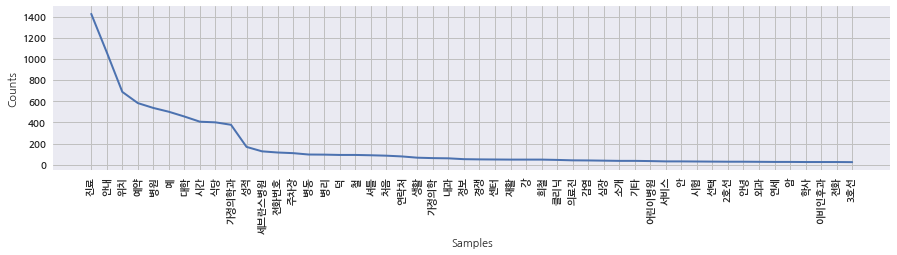

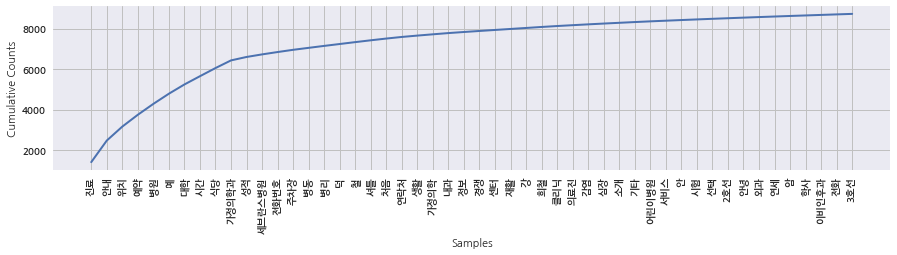

In [148]:
from matplotlib import font_manager, rc

path = 'C:/Anaconda3/Lib/site-packages/pytagcloud/fonts/NanumGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,3))
freqdist.plot(50)

plt.figure(figsize=(15,3))
freqdist.plot(50,cumulative=True)

### 3.1.5 Unique한 명사 리스트 만들기


In [149]:
unique_nouns = set() #//list
unique_list = []



for sent in tagged_sentences:
    for word, tag in sent:
        if tag in ['NNP','NNG']:
            if word not in unique_list:
                unique_list.append(word)
                
for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            unique_nouns.add(word)

unique_nouns = list(unique_nouns)
noun_index = {noun: i for i, noun in enumerate(unique_nouns)} # 딕셔너리 형태의 자료구조
noun_index

{'1호선': 209,
 '2호선': 79,
 '3호선': 217,
 '5호선': 156,
 '가방': 74,
 '가이드': 4,
 '가정': 218,
 '가정의학': 228,
 '가정의학과': 98,
 '감': 278,
 '감기': 253,
 '감사': 135,
 '감염': 172,
 '갑상선': 252,
 '강': 179,
 '개발': 151,
 '객실': 251,
 '검사실': 100,
 '경고': 168,
 '경쟁': 294,
 '고랑': 3,
 '고마워요': 188,
 '고맙습니다': 7,
 '공고': 231,
 '관리': 282,
 '광화문역': 73,
 '교직원': 262,
 '교통수단': 131,
 '구성': 48,
 '굿': 99,
 '귀': 86,
 '기간': 1,
 '기능': 88,
 '기준': 291,
 '기타': 197,
 '길': 214,
 '길음역': 195,
 '나이': 257,
 '날': 266,
 '날씨': 85,
 '날짜': 229,
 '남자': 104,
 '내과': 246,
 '내일': 165,
 '노': 52,
 '노년': 96,
 '노래': 59,
 '뇨': 178,
 '눈': 238,
 '뉴스': 191,
 '다나와': 187,
 '다이얼로그': 283,
 '담당자': 244,
 '당뇨병': 27,
 '대학': 60,
 '덕': 274,
 '데모': 198,
 '도서관': 289,
 '동문서답': 182,
 '등급': 109,
 '등록': 203,
 '땡': 170,
 '땡큐': 6,
 '라운지': 119,
 '러': 107,
 '레': 279,
 '레스토랑': 269,
 '롱': 10,
 '류마티스': 236,
 '말': 136,
 '맛집': 224,
 '맨': 89,
 '머리': 288,
 '멍청이': 61,
 '메': 138,
 '메뉴': 225,
 '메시지': 184,
 '모야': 123,
 '문': 226,
 '뭐': 290,
 '바보': 147,
 '방': 260,
 '방가': 271,
 '방법': 87,
 

In [150]:
unique_list 


['주차장',
 '위치',
 '눈',
 '정시',
 '경쟁',
 '대학',
 '안내',
 '셔틀',
 '시간',
 '2호선',
 '잠실역',
 '안녕',
 '진료',
 '연락처',
 '식당',
 '생활관',
 '시험',
 '감염',
 '내과',
 '병원',
 '종양',
 '예약',
 '3호선',
 '전공',
 '변경',
 '정보',
 '성적',
 '학생부',
 '종합',
 '예',
 '가정의학과',
 '학사',
 '신촌역',
 '불광역',
 '류마티스',
 '가정의학',
 '재활',
 '의학',
 '생활',
 '세탁실',
 '병리',
 '압구정역',
 '출석',
 '청',
 '향',
 '요금',
 '의료진',
 '처음',
 '수시',
 '정',
 '산소',
 '전화번호',
 '소개',
 '기타',
 '서비스',
 '한울',
 '운영',
 '시야',
 '5호선',
 '광화문역',
 '등급',
 '기준',
 '경고',
 '호텔',
 '의사',
 '안',
 '의료',
 '감',
 '맨',
 '소아',
 '심장',
 '배',
 '일정',
 '귀',
 '이비인후과',
 '방',
 '가방',
 '신청',
 '기간',
 '안녕하세요',
 '날씨',
 '정형외과',
 '전화',
 '오늘',
 '어',
 '땡',
 '맛집',
 '얘기',
 '치료',
 '외과',
 '혈관',
 '다나와',
 '송도',
 '에러',
 '어린이병원',
 '메뉴',
 '셔틀버스',
 '접수',
 '외래',
 '축제',
 '병동',
 '재수강',
 '약',
 '정신',
 '비',
 '길',
 '시설',
 '연세',
 '암',
 '장례식',
 '장',
 '개발',
 '시작',
 '다이얼로그',
 '메시지',
 '관리',
 '등록',
 '회사',
 '컨트롤',
 '데모',
 '레스토랑',
 '객실',
 '어른',
 '아이',
 '세브란스병원',
 '덕',
 '철',
 '강',
 '희철',
 '선택',
 '해',
 '심',
 '재',
 '클리닉',
 '센터',
 '통증',
 '당뇨병',
 '변동',
 '사

### 3.1.6 문장-단어 행렬
문장 길이 X 명사 종류 matrix 생성

In [151]:
import numpy as np
occurs = np.zeros([len(tagged_sentences), len(unique_nouns)])
np.shape(occurs)

(6876, 295)

In [152]:
for i, sent in enumerate(tagged_sentences):
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            index = noun_index[word]  # 명사가 있으면, 그 명사의 인덱스를 index에 저정
            occurs[i][index] = 1  # 문장 i의 index 자리에 1을 채워 넣는다.
            
occurs[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

### 3.1.7 공존 단어 행렬 계산

In [153]:
# i 번째 단어
co_occurs = occurs.T.dot(occurs)
co_occurs

array([[ 29.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   2.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   1., ...,   0.,   0.,   0.],
       ..., 
       [  0.,   0.,   0., ...,   6.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   1.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,  51.]])

In [154]:
for i in range(100):
    for j in range(100):
        if (co_occurs[i][j] > 1) & (i>j):
            print(unique_nouns[i], unique_nouns[j], co_occurs[i][j])

신청 기간 2.0
분야 수금 3.0
식당 연락처 22.0
실 원목 3.0
생활관 식당 18.0
접수 외래 2.0
안내 외래 2.0
안내 대학 456.0
안내 접수 2.0
시간 수금 3.0
시간 분야 7.0
시간 식당 162.0
시간 예약 30.0
2호선 신촌역 14.0
심장 혈관 21.0
오늘 식당 4.0
오늘 날씨 12.0
철 수금 3.0
철 분야 7.0
철 시간 14.0
가정의학과 시간 3.0


### 3.1.8 네트워크 그래프

c:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

c:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

c:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



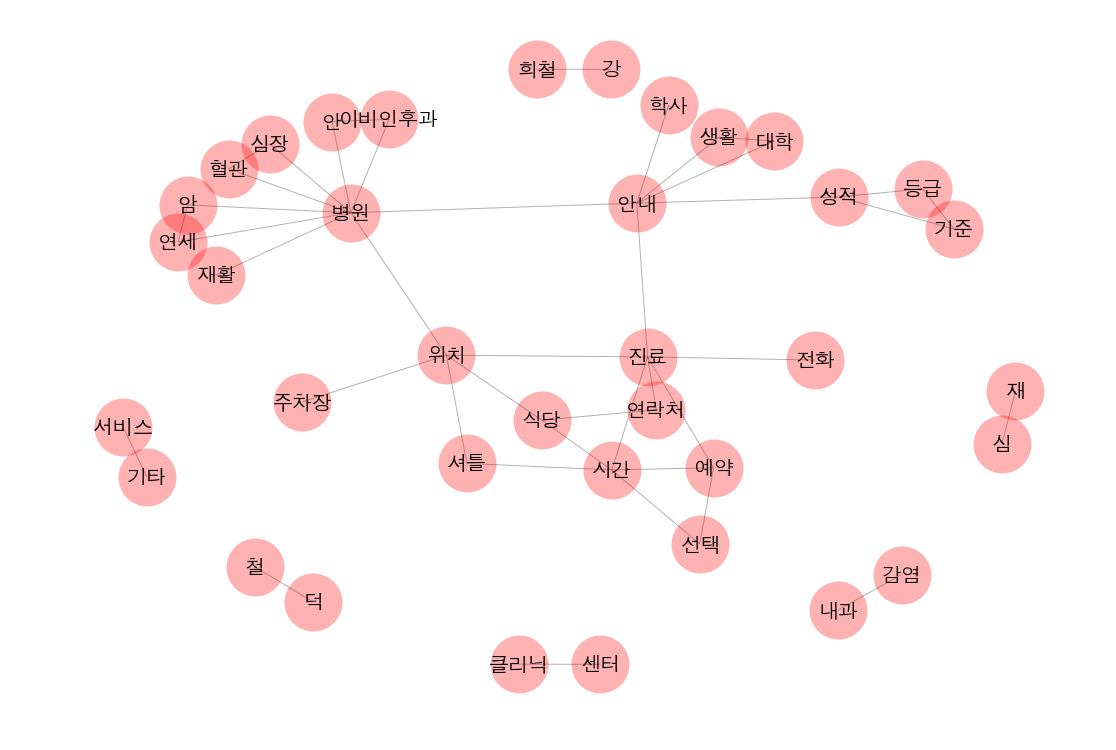

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt


import networkx as nx
graph = nx.Graph()

for i in range(len(unique_nouns)):
    for j in range(i + 1, len(unique_nouns)):
        if co_occurs[i][j] > 20:
            graph.add_edge(unique_nouns[i], unique_nouns[j])
            

krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
plt.rc('font',**krfont)            


plt.figure(figsize=(15, 10))
layout = nx.spring_layout(graph, k=.1)
nx.draw(graph, pos=layout, with_labels=True,
        font_size=20, font_family='AppleGothic',
        alpha=0.3, node_size=3300)
plt.show()

## 3.2 TWITTER

### 3.2.1 TWITTER 형태소 분석

In [157]:
#2.1에서 dff 데이터 사용 예정


lines = list(dff)  ##################################################  dff 리스트화하고 lines이라 칭함

sentences = [line for line in lines if line != '']   ############### 빈 문장 제거 후 sentences라 칭함


for line in lines[:3]:
    if line != '':
        print(line)

from konlpy.tag import Twitter
tagger = Twitter()
tags = tagger.pos(sentences[0])

tagged_sentences = [tagger.pos(sent) for sent in sentences]
tagged_sentences

주차장 위치
눈이 아파
정시 경쟁률보기


[[('주차장', 'Noun'), ('위치', 'Noun')],
 [('눈', 'Noun'), ('이', 'Josa'), ('아파', 'Adjective')],
 [('정시', 'Noun'), ('경쟁률', 'Noun'), ('보기', 'Noun')],
 [('대학', 'Noun'), ('안내', 'Noun')],
 [('셔틀', 'Noun'), ('시간', 'Noun')],
 [('2', 'Number'), ('호선', 'Noun'), ('잠실역', 'Noun')],
 [('안녕', 'Noun')],
 [('안녕', 'Noun')],
 [('진료', 'Noun'), ('연락처', 'Noun')],
 [('대학', 'Noun'), ('안내', 'Noun')],
 [('대학', 'Noun'), ('안내', 'Noun')],
 [('식당', 'Noun'), ('연락처', 'Noun')],
 [('생활관', 'Noun'), ('식당', 'Noun')],
 [('시험', 'Noun')],
 [('감염', 'Noun'), ('내과', 'Noun')],
 [('위치', 'Noun')],
 [('병원', 'Noun'), ('안내', 'Noun')],
 [('위치', 'Noun')],
 [('병원', 'Noun')],
 [('종양', 'Noun'), ('내과', 'Noun'), ('위치', 'Noun')],
 [('무엇', 'Noun'), ('을', 'Josa')],
 [('챗봇', 'Noun'),
  ('으로', 'Josa'),
  ('무엇', 'Noun'),
  ('을', 'Josa'),
  ('할', 'Verb'),
  ('수', 'Noun'),
  ('있', 'Adjective'),
  ('나요', 'Eomi'),
  ('?', 'Punctuation')],
 [('챗봇', 'Noun')],
 [('진료', 'Noun'), ('안내', 'Noun')],
 [('진료', 'Noun'), ('예약', 'Noun')],
 [('2', 'Number'), ('.', 'Pun

### 3.2.2 TWITTER 명사 추출

In [158]:
# 명사 리스트 만들어 보기 / 태그가 NNP, NNG로 시작하는 명사를 리스트
noun_listt = []

for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['Noun']:
            noun_listt.append(word)
noun_listt[:10]



['주차장', '위치', '눈', '정시', '경쟁률', '보기', '대학', '안내', '셔틀', '시간']

### 3.2.3 TWITTER 명사 빈도수 추출

In [159]:
# collection library를 이용하여 빈도수 계산하기
from collections import Counter

noun_countss = Counter(noun_listt)
noun_countss.most_common(50)

[('진료', 1426),
 ('안내', 1063),
 ('위치', 689),
 ('예약', 571),
 ('병원', 537),
 ('예', 501),
 ('대학', 456),
 ('가정의학', 441),
 ('시간', 407),
 ('식당', 401),
 ('성적', 169),
 ('세브란스병원', 127),
 ('전화번호', 116),
 ('주차장', 110),
 ('월', 102),
 ('병리', 97),
 ('병동', 97),
 ('덕철', 93),
 ('셔틀', 90),
 ('처음', 86),
 ('하이', 84),
 ('연락처', 79),
 ('생활', 67),
 ('내과', 66),
 ('호선', 64),
 ('정보', 53),
 ('경쟁률', 51),
 ('보기', 51),
 ('센터', 50),
 ('재활', 49),
 ('강희', 49),
 ('철', 49),
 ('클리', 46),
 ('닉', 46),
 ('의료', 45),
 ('진', 42),
 ('감염', 41),
 ('심장', 39),
 ('알려줭', 38),
 ('소개', 37),
 ('기타', 37),
 ('상세', 36),
 ('방가', 35),
 ('어린이병원', 35),
 ('서비스', 32),
 ('시험', 31),
 ('안녕', 30),
 ('선택', 30),
 ('외과', 29),
 ('뭐', 29)]

### 3.2.4 TWITTER 시각화

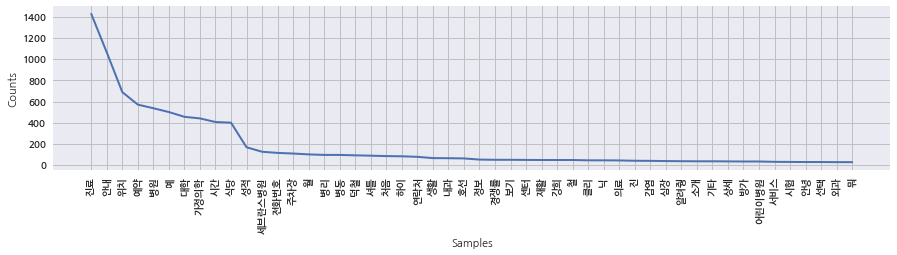

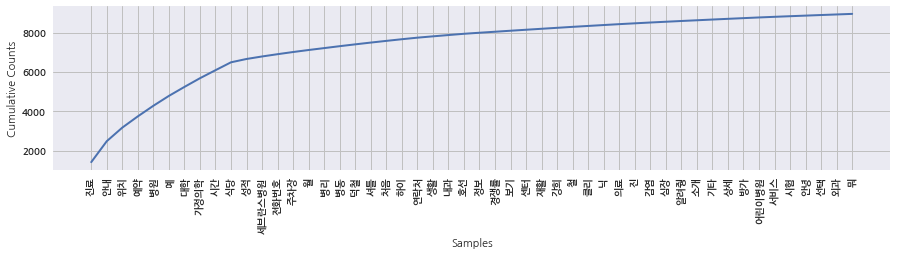

In [162]:
import nltk
import matplotlib.pyplot as plt # 결과를 시각화 하기 위한 matplotlib
%matplotlib inline

# word index 대신 word를 보여주는 그래프
freqdist = nltk.FreqDist(noun_countss)

plt.figure(figsize=(15,3))
freqdist.plot(50)

plt.figure(figsize=(15,3))
freqdist.plot(50,cumulative=True)

### 3.2.5 Unique한 명사 리스트 만들기

In [164]:
# unique한 명사 리스트 만들기

unique_nounss = set()
unique_listt = []

for sent in tagged_sentences:
    for word, tag in sent:
        if tag in ['Noun']:
            if word not in unique_listt:
                unique_listt.append(word)
                
for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['Noun']:
            unique_nounss.add(word)

unique_nounss = list(unique_nounss)
noun_index = {noun: i for i, noun in enumerate(unique_nounss)} # 딕셔너리 형태의 자료구조
noun_index


{'가야': 149,
 '가이드': 1,
 '가정': 154,
 '가정의학': 66,
 '간': 194,
 '감': 78,
 '감기': 166,
 '감사': 219,
 '감염': 324,
 '갑상선': 74,
 '강희': 127,
 '개': 181,
 '개발': 48,
 '객실': 254,
 '거': 61,
 '검': 50,
 '것': 7,
 '경고': 322,
 '경쟁률': 12,
 '고랑': 190,
 '곧': 250,
 '공': 244,
 '공고': 67,
 '관리': 258,
 '광화문역': 287,
 '교직원': 172,
 '교통': 305,
 '구성': 13,
 '굿잡': 21,
 '귀가': 57,
 '그라드': 2,
 '기간': 188,
 '기능': 203,
 '기준': 362,
 '기타': 332,
 '길': 336,
 '길음역': 58,
 '나': 304,
 '나이': 169,
 '날씨': 291,
 '날짜': 245,
 '남자': 207,
 '내과': 73,
 '내일': 230,
 '너': 103,
 '너그': 119,
 '너무': 317,
 '넌': 179,
 '네': 68,
 '노': 16,
 '노년': 117,
 '노래': 20,
 '놈': 330,
 '누가': 353,
 '누구': 182,
 '눈': 162,
 '눈온': 200,
 '뉴스': 237,
 '니': 112,
 '닉': 358,
 '다나': 221,
 '다이얼로그': 360,
 '달라': 341,
 '담당자': 72,
 '당뇨병': 268,
 '대학': 284,
 '더': 185,
 '덕철': 247,
 '데모': 331,
 '도서관': 361,
 '동문서답': 138,
 '등급': 122,
 '등록': 148,
 '땡큐': 88,
 '똒똑하': 197,
 '라운지': 300,
 '람': 267,
 '레스토랑': 354,
 '렐': 19,
 '로': 186,
 '로우': 173,
 '루': 9,
 '룸': 104,
 '류마티스': 69,
 '리': 84,
 '리바': 298

### 3.2.6 문자-단어 행렬

In [167]:

import numpy as np
# 문장 길이 X 명사 종류 matrix 생성
occurss = np.zeros([len(tagged_sentences), len(unique_nounss)])
np.shape(occurss)

(6876, 365)

In [169]:
for i, sent in enumerate(tagged_sentences):
    for word, tag in sent:
        if tag in ['Noun']:
            index = noun_index[word]  # 명사가 있으면, 그 명사의 인덱스를 index에 저정
            occurss[i][index] = 1  # 문장 i의 index 자리에 1을 채워 넣는다.
            
occurss[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

### 3.2.7 공존-단어 행렬 계산

In [170]:
# 공존 단어 행렬 계산

# i 번째 단어
co_occurss = occurss.T.dot(occurss)

In [171]:
for i in range(100):
    for j in range(100):
        if (co_occurss[i][j] > 1) & (i>j):
            print(unique_nounss[i], unique_nounss[j], co_occurss[i][j])

외래 및 2.0
개발 가이드 5.0
개발 해 2.0
검 실 2.0
언재쯤 추위 2.0
정시 경쟁률 8.0
언제 추위 2.0
내과 소화기 3.0


### 3.2.8 네트워크 그래프

c:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

c:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

c:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



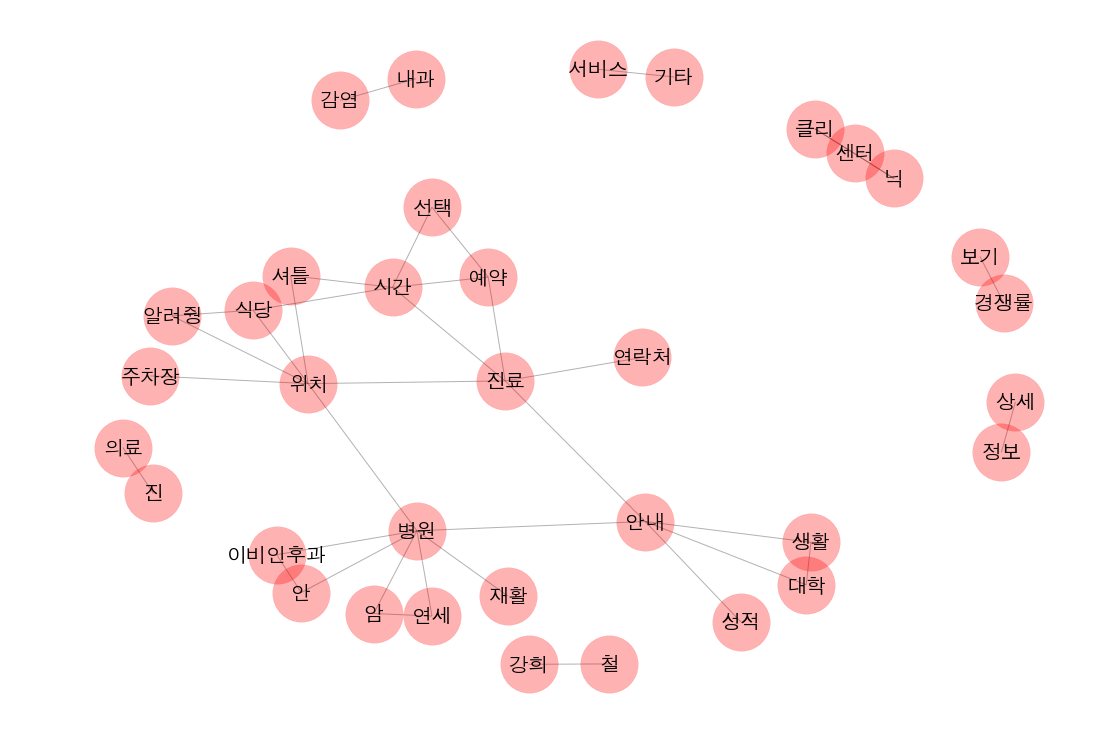

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt


import networkx as nx
graph = nx.Graph()

for i in range(len(unique_nounss)):
    for j in range(i + 1, len(unique_nounss)):
        if co_occurss[i][j] > 24:
            graph.add_edge(unique_nounss[i], unique_nounss[j])
            

krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
plt.rc('font',**krfont)            


plt.figure(figsize=(15, 10))
layout = nx.spring_layout(graph, k=.1)
nx.draw(graph, pos=layout, with_labels=True,
        font_size=20, font_family='AppleGothic',
        alpha=0.3, node_size=3300)
plt.show()

# 4. Text Mining_감성분석

   ## 4.1 긍부정 트랜드 출력